<Body>   
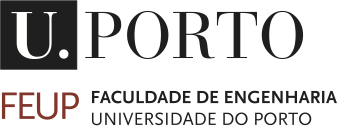   
<h1> <b>Swarm Robotics Competitions 2022/2023 </b> </h1>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt)

FEUP, Oct. 2022

---



# 5 - Motion control of a swarm of agents: following a leader



### **A swarm of multiple single integrator dynamics**


Consider a fleet of n=5 agents (robots), where each agent satisfies the following dynamics

$$ 
\begin{align}
\dot x_i = u_i, \quad i =1, 2, \ldots n
\end{align}
$$

where 
$$
x_i = 
\begin{bmatrix} 
x_{1i} \\
x_{2i}
\end{bmatrix} \,, \quad
u_i = 
\begin{bmatrix} 
u_{1i} \\
u_{2i} 
\end{bmatrix}
$$

are the 2D state and 2D control for each agent $i$, respectively.

Suppose that the agents are only able to communicate to each other, according to the following graph topology:

<Body>   
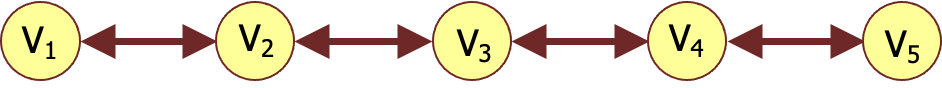


### **Following a leader**


Consider now that agent $1$ is assigned to be the leader of the formation, and suppose that its goal is to track a given referense trajectory $x_d(t)$.

From the previous notebook, it follows that the feedback controller for agent $1$ is given by

$$
u_1 = - K_1 (x_1-x_d) + \dot x_d
$$

where $K_1$ is a $2\times 2$ positive-definite matrix gain.





To make sure that the other agents follow the leader, we set 

$$
u_i = - K_i \sum_{j\in N_i}\big((x_i-x_j) -b_{ij}\big) + \dot x_d, \quad i=2, 3,\ldots n
$$

where $K_i$ is a $2\times 2$ positive-definite matrix gain, and the bias terms $b_{ij}= -b_{ji}$ specifies the formation configuration.

Let's see the case when 
$$
x_d(t) = \begin{cases}
(0,0), &\quad 0 \le t < 5 \
(5,0), &\quad t \ge 5
\end{cases}
$$

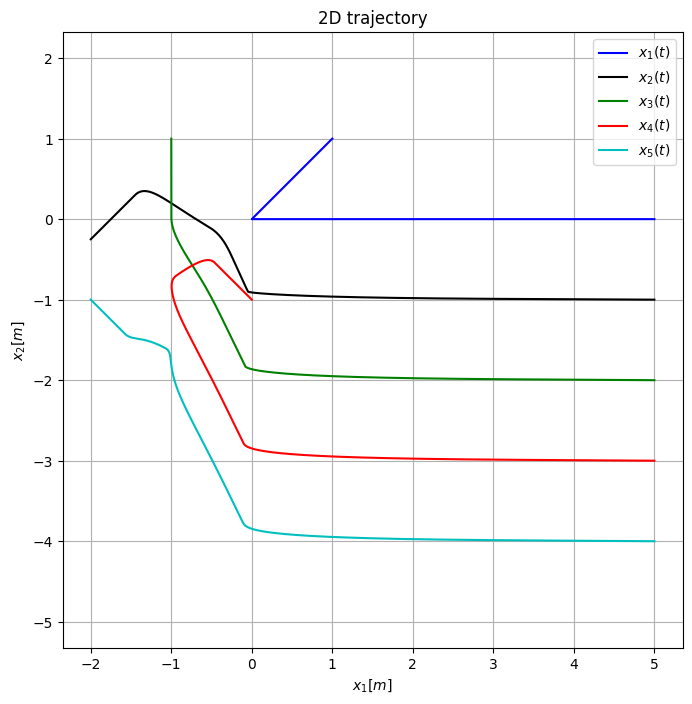

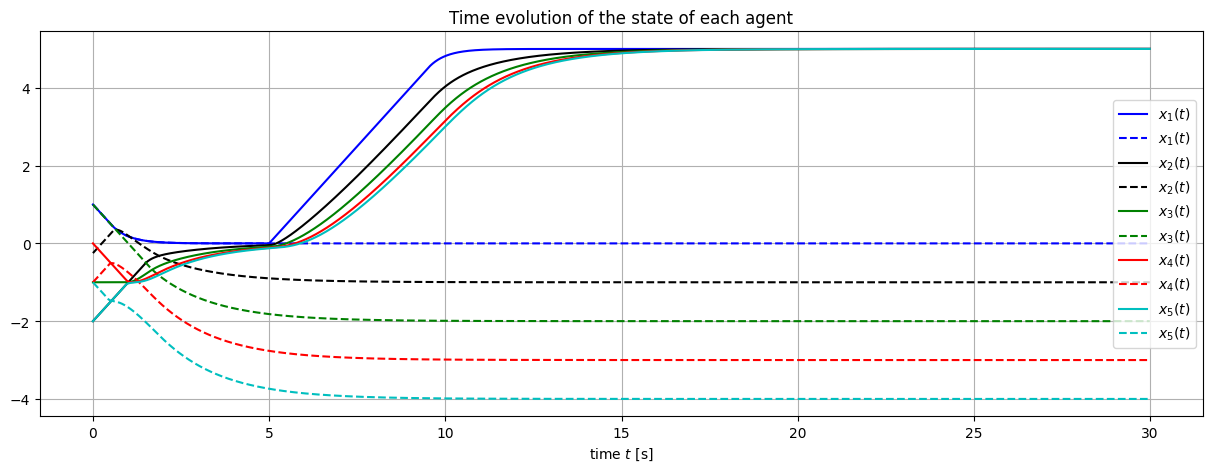

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def step_f(x,u,h):
  return x + u*h

h = 0.01 # This is my sampling time
t_end=30 # This is my final time of the simulation

t_signal = np.arange(0,t_end,h) # time samples

x1_signal = np.zeros_like([t_signal,t_signal])
u1_signal = np.zeros_like([t_signal,t_signal])
x2_signal = np.zeros_like([t_signal,t_signal])
u2_signal = np.zeros_like([t_signal,t_signal])
x3_signal = np.zeros_like([t_signal,t_signal])
u3_signal = np.zeros_like([t_signal,t_signal])
x4_signal = np.zeros_like([t_signal,t_signal])
u4_signal = np.zeros_like([t_signal,t_signal])
x5_signal = np.zeros_like([t_signal,t_signal])
u5_signal = np.zeros_like([t_signal,t_signal])

xd_signal= np.zeros_like(x1_signal)
xd_dot_signal= np.zeros_like(x1_signal)


#Initial conditions of our each agent
x1_signal[:,0] = [1.0, 1.0]
x2_signal[:,0] = [-2.0, -0.25]
x3_signal[:,0] = [-1.0, 1.0]
x4_signal[:,0] = [0.0, -1.0]
x5_signal[:,0] = [-2.0, -1.0]

# control parameters
kx, ky = 2, 2
K = np.diag([kx,ky])

b12 = [0.0, 1.0]
b23 = [0.0, 1.0]
b34 = [0.0, 1.0]
b45 = [0.0, 1.0]

# Iteration
for i in range(0,t_signal.shape[0]-1):
  # desired signal
  xd_signal[:,i] = 5*np.array([ np.heaviside(t_signal[i]-5,1.0), 0 ])
  # The following is just to simplify the notation
  xd = xd_signal[:,i]
  xd_dot = xd_dot_signal[:,i]
  x1 = x1_signal[:,i]
  x2 = x2_signal[:,i]
  x3 = x3_signal[:,i]
  x4 = x4_signal[:,i]
  x5 = x5_signal[:,i]

  # control signals
  u1_signal[:,i] = -K@(x1-xd) + xd_dot
  u2_signal[:,i] = -1.5*K@((x2-x1+b12)+(x2-x3)-b23) + xd_dot
  u3_signal[:,i] = -2*K@((x3-x2+b23)+(x3-x4)-b34) + xd_dot
  u4_signal[:,i] = -2.5*K@((x4-x3+b34)+(x4-x5)-b45) + xd_dot
  u5_signal[:,i] = -3*K@((x5-x4+b45)) + xd_dot

  u1_signal[:,i] = np.clip(u1_signal[:,i],-1,1)
  u2_signal[:,i] = np.clip(u2_signal[:,i],-1,1)
  u3_signal[:,i] = np.clip(u3_signal[:,i],-1,1)
  u4_signal[:,i] = np.clip(u4_signal[:,i],-1,1)
  u5_signal[:,i] = np.clip(u5_signal[:,i],-1,1)
  
  # update/send the actuation signals
  x1_signal[:,i+1] = step_f(x1_signal[:,i],u1_signal[:,i],h)
  x2_signal[:,i+1] = step_f(x2_signal[:,i],u2_signal[:,i],h)
  x3_signal[:,i+1] = step_f(x3_signal[:,i],u3_signal[:,i],h)
  x4_signal[:,i+1] = step_f(x4_signal[:,i],u4_signal[:,i],h)
  x5_signal[:,i+1] = step_f(x5_signal[:,i],u5_signal[:,i],h)

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.plot(x1_signal[0], x1_signal[1], label='$x_1(t)$', color='b')
plt.plot(x2_signal[0], x2_signal[1], label='$x_2(t)$', color='k')
plt.plot(x3_signal[0], x3_signal[1], label='$x_3(t)$', color='g')
plt.plot(x4_signal[0], x4_signal[1], label='$x_4(t)$', color='r')
plt.plot(x5_signal[0], x5_signal[1], label='$x_5(t)$', color='c')
plt.xlabel('$x_1 [m]$');
plt.ylabel('$x_2 [m]$');
plt.title('2D trajectory');
plt.legend(loc='best')
plt.grid()


plt.figure(figsize=(15,5))
plt.plot(t_signal, x1_signal[0], label='$x_1(t)$', color='b')
plt.plot(t_signal, x1_signal[1], label='$x_1(t)$', color='b', linestyle='dashed')
plt.plot(t_signal, x2_signal[0], label='$x_2(t)$', color='k')
plt.plot(t_signal, x2_signal[1], label='$x_2(t)$', color='k', linestyle='dashed')
plt.plot(t_signal, x3_signal[0], label='$x_3(t)$', color='g')
plt.plot(t_signal, x3_signal[1], label='$x_3(t)$', color='g', linestyle='dashed')
plt.plot(t_signal, x4_signal[0], label='$x_4(t)$', color='r')
plt.plot(t_signal, x4_signal[1], label='$x_4(t)$', color='r', linestyle='dashed')
plt.plot(t_signal, x5_signal[0], label='$x_5(t)$', color='c')
plt.plot(t_signal, x5_signal[1], label='$x_5(t)$', color='c', linestyle='dashed')
plt.xlabel('time $t$ [s]');
plt.legend(loc='best')
plt.grid()
plt.title('Time evolution of the state of each agent');


Let's make a movie!

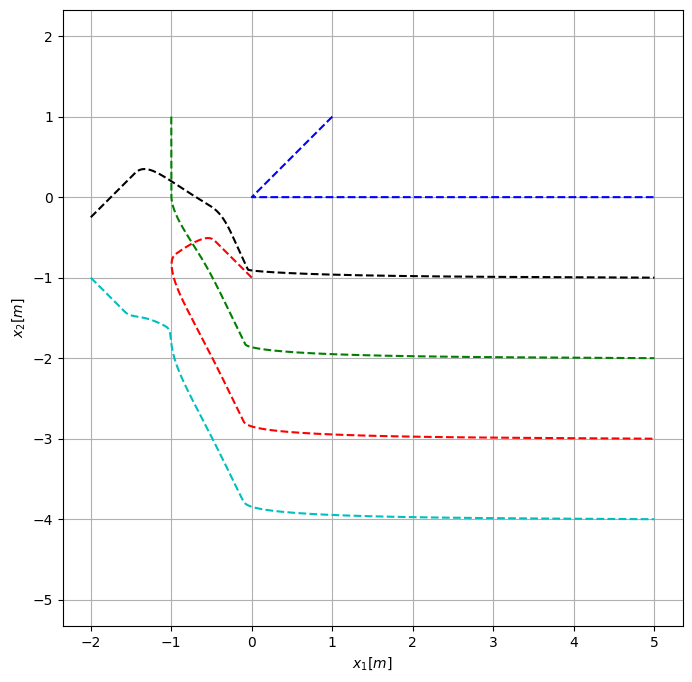

In [10]:
fig1 = plt.figure(figsize=(8,8))
ax3 = fig1.add_subplot();
ax3.plot(x1_signal[0], x1_signal[1], label='$x_1(t)$', color='b', linestyle='dashed')
ax3.plot(x2_signal[0], x2_signal[1], label='$x_2(t)$', color='k', linestyle='dashed')
ax3.plot(x3_signal[0], x3_signal[1], label='$x_3(t)$', color='g', linestyle='dashed')
ax3.plot(x4_signal[0], x4_signal[1], label='$x_4(t)$', color='r', linestyle='dashed')
ax3.plot(x5_signal[0], x5_signal[1], label='$x_5(t)$', color='c', linestyle='dashed')

ax3.axis('equal');
ax3.set_xlabel('$x_1 [m]$');
ax3.set_ylabel('$x_2 [m]$');
ax3.grid();

In [11]:
txt_title = ax3.set_title('')
pt1, = ax3.plot([], [], 'b.', ms=20)
line1, = ax3.plot([], [], 'b', lw=2)
pt2, = ax3.plot([], [], 'k.', ms=20)
line2, = ax3.plot([], [], 'k', lw=2)
pt3, = ax3.plot([], [], 'g.', ms=20)
line3, = ax3.plot([], [], 'g', lw=2)
pt4, = ax3.plot([], [], 'r.', ms=20)
line4, = ax3.plot([], [], 'r', lw=2)
pt5, = ax3.plot([], [], 'c.', ms=20)
line5, = ax3.plot([], [], 'c', lw=2)

def drawframe(n):
    size_x = len(x1_signal[0])
    frames = 100
    t_win = int(size_x/frames*(n+1)-1)
    line1.set_data(x1_signal[0, 0:t_win],x1_signal[1, 0:t_win])  
    pt1.set_data(x1_signal[0, t_win],x1_signal[1, t_win])  
    line2.set_data(x2_signal[0, 0:t_win],x2_signal[1, 0:t_win])  
    pt2.set_data(x2_signal[0, t_win],x2_signal[1, t_win])  
    line3.set_data(x3_signal[0, 0:t_win],x3_signal[1, 0:t_win])  
    pt3.set_data(x3_signal[0, t_win],x3_signal[1, t_win])  
    line4.set_data(x4_signal[0, 0:t_win],x4_signal[1, 0:t_win])  
    pt4.set_data(x4_signal[0, t_win],x4_signal[1, t_win])  
    line5.set_data(x5_signal[0, 0:t_win],x5_signal[1, 0:t_win])  
    pt5.set_data(x5_signal[0, t_win],x5_signal[1, t_win])  
    
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (pt1, line1) #(line1,line2)


from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig1, drawframe, frames=100, interval=50, blit=True)




from IPython.display import HTML
HTML(anim.to_html5_video())

**Activity 1.** Go above and try:

1.   Other (positive) values for the gains
2.   Different initial conditions $x_i(0)$
3. Different reference signals $x_d(t)$


**Activity 2.** Suppose now that your control signals (that is the velocities of the agents) can only take values between $[-1, 1]$. Go above and limit to that values by including saturations (e.g., for $u_1$ just do *u_control1 = np.clip(u_control1, -1, 1)*